In [401]:
from model import *

import time
import sys
#!{sys.executable} -m pip install [arg]

import random

import torch
from torch_geometric.data import Data
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree

import numpy as np
from itertools import permutations
from sklearn.metrics import euclidean_distances


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")


# Example

In [3]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)

x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

In [4]:
data = Data(x=x, edge_index=edge_index)

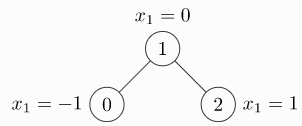

# Model

`propagate()` internally calls `message()`, `aggregate()` and `update()`

In [10]:
class Graph(MessagePassing):
    
    
    def __init__(self, N, w_init):
        """
        N      : number of agent nodes
        w_init : initial wealth of agents
        """
        # construct edges
        pairs = list(permutations(range(N), 2))    
        edge_index = torch.tensor(pairs, dtype=torch.long).t().contiguous()

        # initial wealth levels
        x = torch.tensor([[w_init]*N], dtype=torch.float).t()

        # construct Data object
        # weights all equal since wealth distribution is uniform initially
        self.data = Data(x=x, edge_index=edge_index, edge_weights=torch.ones(edge_index.shape))
        
        
    def forward(self):
        pass
    

    def message(self):
        pass

Each step:

- Each agent solves Bellman equation in order to decide whether they will:
    - 1) choose safe strategy
    - 2) choose risky strategy
        - if risky, agent gets randomly assigned to : (a) start own project ; (b) invest in a neighbour's project
        
        
- Safe strategy agents...
    - update their wealth using safe bequest: $s\hat{r}$ formula
    

- Risky strategy agents...
    - pick consumption, and compute $\beta I$
    - If OWN
        - compute $(1-\beta)I$
        - check 

In [333]:
gamma  = 2.1 # utility function parameter
A      = 1.2 # utility function parameter
r0     = 0.5 # left bound for uniform random return on project
r1     = 2.5 # right bound for uniform random return on project
r_hat  = 1.1 # safe return
I      = 0.3 # amount needed to undertake project
e_bar  = 1.5 # amount of entrepreneurial effort needed to undertake project
r_bar  = (1/(r1-r0)) * integrate.quad(lambda x: x, r0, r1)[0] # expected project return
w_init = 0.1

In [723]:
(0.5 + 1.8) / 2

1.15

In [464]:
def connection_probability(D, alpha=5, b=0.5):
    return 1/(1+np.exp(alpha*(D-b)))

In [733]:
r0 = 0.9
r1 = 1.1

In [736]:
num_agents = 1000

agents = list(range(10))

project_cost = 0.1

c0, c1 = 0.4, 0.7
WEALTH = np.random.uniform(c0, c1, num_agents).reshape(-1,1)


REPS = 100

wealths = [WEALTH]


for _ in range(REPS):
    
    WEALTH = np.copy(WEALTH)
    
    random.shuffle(agents)

    # compute homophily-based adjacency matrix
    D   = euclidean_distances(WEALTH)
    P   = connection_probability(D)
    ADJ = P < np.random.uniform(size=(num_agents,num_agents))
    np.fill_diagonal(ADJ, True)
            
    unavailable = set()
    
    for i in agents:
    
        neighbors = np.where(ADJ[i])[0]
        neighbors = np.array([x for x in neighbors if x not in unavailable])        
        pooled_wealth = sum(WEALTH[j] for j in neighbors)
        
        # project is undertaken
        if pooled_wealth >= project_cost:
            
            unavailable  = unavailable.union(set(neighbors))
            outcome      = pooled_wealth * np.random.uniform(r0,r1)
            contribution = WEALTH[neighbors] / pooled_wealth
            
            # assign new wealth
            WEALTH[neighbors] = contribution*outcome
            
    wealths.append(WEALTH)

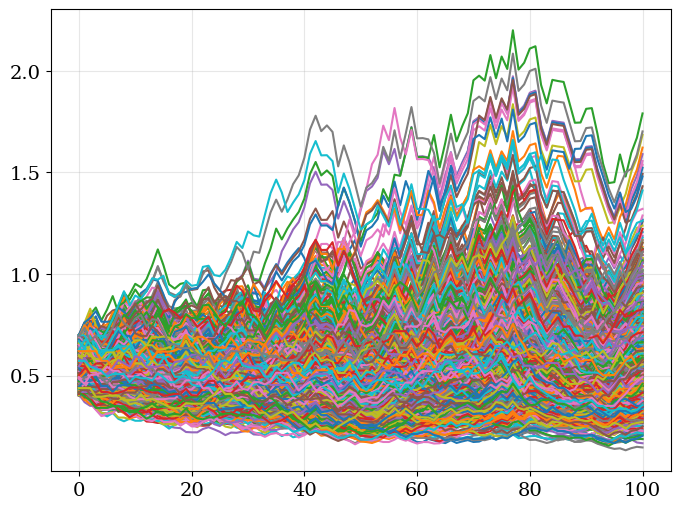

In [737]:
for a in range(num_agents):
    plt.plot([wealths[i][a] for i in range(len(wealths))])
    
plt.show()

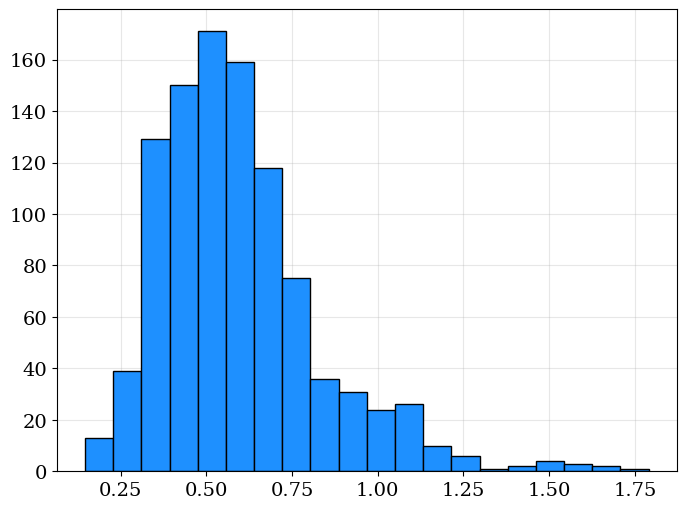

In [738]:
plt.hist(wealths[-1], color="dodgerblue", edgecolor="k", bins=20)
plt.show()

In [739]:

for a in range(num_agents):
    for trajectory in wealths:
        if trajectory[a] < 0.5:
            print(a, wealths[-1][a][0] < 1)
            break
        

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 False
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
23 True
24 True
25 True
26 True
27 True
29 True
30 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 False
42 True
43 True
44 True
45 True
47 True
49 True
50 True
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True
59 True
60 True
61 True
62 True
63 True
65 True
66 True
67 True
68 True
69 True
70 True
71 True
72 True
74 True
75 True
76 True
77 True
78 True
79 False
80 True
81 True
82 True
83 True
84 True
85 True
86 True
87 True
88 True
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True
100 True
101 True
103 True
104 True
105 True
107 True
109 True
110 True
111 True
113 True
114 True
117 True
118 True
119 True
120 True
121 True
122 True
123 True
125 True
126 True
127 True
128 True
130 True
131 True
132 False
133 True
134 True
135 True
136 True
137 True
